In [1]:
import joblib 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from collections import Counter


In [3]:
# load in lda outputs 
fortnite_lda_output = joblib.load(r"Resources\Resources\fortnite_lda_model.joblib")
csgo_lda_output = joblib.load(r"Resources\Resources\csgo_lda_output.joblib")
league_lda_output = joblib.load(r"Resources\Resources\league_lda_output.joblib")
warcraft_lda_output = joblib.load(r"Resources\Resources\warcraft_lda_output.joblib")

C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 1.0.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
# load in vectorizers
fortnite_vectorizer = joblib.load(r"Resources\Resources\fortnite_vectorizer.joblib")
csgo_vectorizer = joblib.load(r"Resources\Resources\csgo_vectorizer.joblib")
league_vectorizer = joblib.load(r"Resources\Resources\league_vectorizer.joblib")
warcraft_vectorizer = joblib.load(r"Resources\Resources\warcraft_vectorizer.joblib")

C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
# load in lemmatised data 
fortnite_lemmatised = joblib.load(r"Resources\Resources\fornite_lemmatised.joblib")
csgo_lemmatised = joblib.load(r"Resources\Resources\csgo_lemmatised.joblib")
league_lemmatised = joblib.load(r"Resources\Resources\league_lemmatised.joblib")
warcraft_lemmatised = joblib.load(r"Resources\Resources\warcraft_lemmatised.joblib")

In [7]:
# load in lda model
fortnite_lda_model = joblib.load(r"Resources\Resources\fortnite_lda_model.joblib")
csgo_lda_model = joblib.load(r"Resources\Resources\csgo_lda_model.joblib")
league_lda_model = joblib.load(r"Resources\Resources\league_lda_model.joblib")
warcraft_lda_model = joblib.load(r"Resources\Resources\warcraft_lda_model.joblib")

In [6]:
# vectorize data
fortnite_data_vectorized = fortnite_vectorizer.fit_transform(fortnite_lemmatised[:500000])
csgo_data_vectorized = csgo_vectorizer.fit_transform(csgo_lemmatised[:500000])
league_data_vectorized = league_vectorizer.fit_transform(league_lemmatised[:500000])
warcraft_data_vectorized = warcraft_vectorizer.fit_transform(warcraft_lemmatised[:500000])

In [8]:
fortnite_df = joblib.load(r"Resources\Resources\fortnite_df")
league_df = joblib.load(r"Resources\Resources\league_df.joblib")
csgo_df = joblib.load(r"Resources\Resources\csgo_df.joblib")
warcraft_df = joblib.load(r"Resources\Resources\warcraft_df.joblib")

In [9]:
league_df_bigger = joblib.load(r"Resources\Resources\league_df_bigger.joblib")
csgo_df_smaller = joblib.load(r"Resources\Resources\csgo_df_smaller.joblib")

In [9]:
fortnite_vectorizer.transform(fortnite_df['Message'])
league_vectorizer.transform(league_df['Message'])
csgo_vectorizer.transform(csgo_df['Message'])
warcraft_vectorizer.transform(warcraft_df['Message'])

<101510x6303 sparse matrix of type '<class 'numpy.int64'>'
	with 138252 stored elements in Compressed Sparse Row format>

In [10]:
league_vectorizer.transform(league_df_bigger['Message'])
csgo_vectorizer.transform(csgo_df_smaller['Message'])

<58903x5537 sparse matrix of type '<class 'numpy.int64'>'
	with 72127 stored elements in Compressed Sparse Row format>

In [11]:
messages = fortnite_df.loc[(fortnite_df['Time'] >= 10) & (fortnite_df['Time'] < 15)]['Message']
messages

9                                            tfuecrack 
10     uptime de36feb966166675d4d69ac6986b0d6354837fbc 
11    de36feb966166675d4d69ac6986b0d6354837fbc tfue ...
12     uptime de36feb966166675d4d69ac6986b0d6354837fbc 
13                    ninja will qual guys stop hating 
14    de36feb966166675d4d69ac6986b0d6354837fbc tfue ...
Name: Message, dtype: object

In [12]:
vect = fortnite_vectorizer.transform(messages)
topics = fortnite_lda_model.transform(vect)
topics.shape

(6, 5)

In [13]:
np.array(topics)[:, 0]

array([0.10000001, 0.10000001, 0.06666668, 0.10000001, 0.23999793,
       0.06666668])

In [14]:
np.mean(np.array(topics)[:, 0])

0.11222188382659125

In [15]:
# create a list of the topic percentages over the fortnite stream 

step_size = 5
topic_list = [[], [], [], [], []]
for i in range(0, int(max(fortnite_df['Time'])), step_size):
  messages = fortnite_df.loc[(fortnite_df['Time'] >= i) & (fortnite_df['Time'] < i+step_size)]['Message']
  vect = fortnite_vectorizer.transform(messages)
  if messages.shape[0] == 0:
    continue
    vect = np.zeros((5, 7407))
  topics = fortnite_lda_model.transform(vect)
  for i in range(5):
   # av = np.mean(np.array(topics)[:, i])
   # topic_list[i].append(av)
    topic_list[i].extend((np.array(topics)[:, i]))


In [16]:
league_topic_list = [[], [], [], [], []]
for i in range(0, int(max(league_df['Time'])), 5):
  messages = league_df.loc[(league_df['Time'] >= i) & (league_df['Time'] < i+5)]['Message']
  vect = league_vectorizer.transform(messages)
  if messages.shape[0] == 0:
    continue
    vect = np.zeros((5, 7407))
  topics = league_lda_model.transform(vect)
  for i in range(5):
    league_topic_list[i].extend((np.array(topics)[:, i]))
  

In [17]:
league_bigger_topic_list = [[], [], [], [], []]
for i in range(0, int(max(league_df_bigger['Time'])), 5):
  messages = league_df_bigger.loc[(league_df_bigger['Time'] >= i) & (league_df_bigger['Time'] < i+5)]['Message']
  vect = league_vectorizer.transform(messages)
  if messages.shape[0] == 0:
    continue
    vect = np.zeros((5, 7407))
  topics = league_lda_model.transform(vect)
  for i in range(5):
    league_bigger_topic_list[i].extend((np.array(topics)[:, i]))

In [18]:
csgo_topic_list = [[], [], [], [], []]

for i in range(0, int(max(csgo_df['Time'])), 5):
  messages = csgo_df.loc[(csgo_df['Time'] >= i) & (csgo_df['Time'] < i+5)]['Message']
  vect = csgo_vectorizer.transform(messages)
  if messages.shape[0] == 0:
    continue
    vect = np.zeros((5, 7407))
  topics = csgo_lda_model.transform(vect)
  for i in range(5):
    csgo_topic_list[i].extend((np.array(topics)[:, i]))

csgo_topic_array = np.array(csgo_topic_list)

In [19]:
csgo_topic_list_smaller = [[], [], [], [], []]

for i in range(0, int(max(csgo_df_smaller['Time'])), 5):
  messages = csgo_df_smaller.loc[(csgo_df_smaller['Time'] >= i) & (csgo_df_smaller['Time'] < i+5)]['Message']
  vect = csgo_vectorizer.transform(messages)
  if messages.shape[0] == 0:
    continue
    vect = np.zeros((5, 7407))
  topics = csgo_lda_model.transform(vect)
  for i in range(5):
    csgo_topic_list_smaller[i].extend((np.array(topics)[:, i]))

csgo_topic_array2 = np.array(csgo_topic_list_smaller)

In [20]:
warcraft_topic_list = [[], [], [], [], []]

for i in range(0, int(max(csgo_df['Time'])), 5):
  messages = warcraft_df.loc[(warcraft_df['Time'] >= i) & (warcraft_df['Time'] < i+5)]['Message']
  vect = warcraft_vectorizer.transform(messages)
  if messages.shape[0] == 0:
    continue
    vect = np.zeros((5, 7407))
  topics = warcraft_lda_model.transform(vect)
  for i in range(5):
    warcraft_topic_list[i].extend((np.array(topics)[:, i]))

warcraft_topic_array = np.array(warcraft_topic_list)

In [21]:
topic_array = np.array(topic_list)
league_topic_array = np.array(league_topic_list)

In [22]:
# the bigger league of legends stream
league_topic_array2 = np.array(league_bigger_topic_list)


Text(0.5, 1.0, 'Topics over time in Fortnite \n Smoothed with savgol filter using size = 501, order = 3')

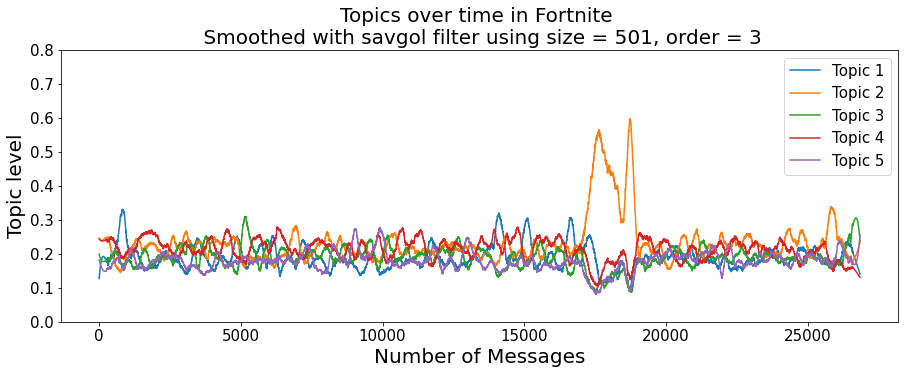

In [55]:
# plot fortnite topic percentages over time 
# 25, 8
plt.figure(figsize=(15, 5))
start = 0
limit = topic_array.shape[1]

window = 501
order = 3

plt.plot(range(topic_array.shape[1])[start:start+limit], savgol_filter(topic_array[0][start:start+limit], window, order), label="Topic 1")
plt.plot(range(topic_array.shape[1])[start:start+limit], savgol_filter(topic_array[1][start:start+limit], window, order), label="Topic 2")
plt.plot(range(topic_array.shape[1])[start:start+limit], savgol_filter(topic_array[2][start:start+limit], window, order), label="Topic 3")
plt.plot(range(topic_array.shape[1])[start:start+limit], savgol_filter(topic_array[3][start:start+limit], window, order), label="Topic 4")
plt.plot(range(topic_array.shape[1])[start:start+limit], savgol_filter(topic_array[4][start:start+limit], window, order), label="Topic 5")
plt.legend(fontsize=15)
plt.xlabel("Number of Messages", fontsize=20)
plt.ylabel("Topic level", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.8])
plt.title("Topics over time in Fortnite \n Smoothed with savgol filter using size = %d, order = %d" % (window, order), fontsize=20)

Text(0.5, 1.0, 'Topics over time in Fortnite \n No Smoothing')

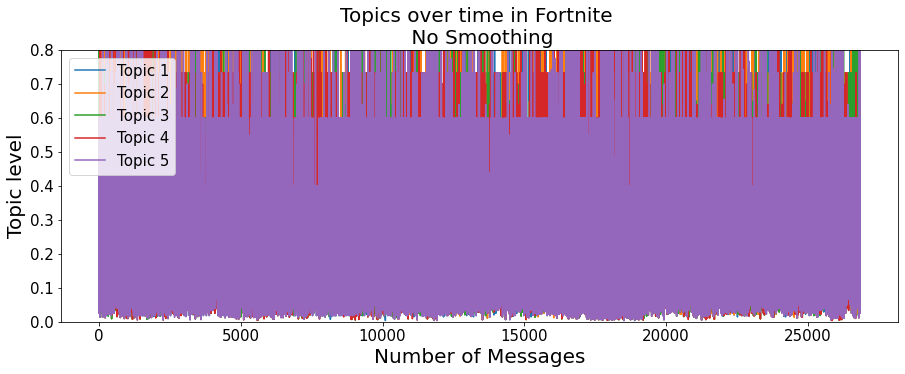

In [88]:
# plot fortnite topic percentages over time 
# 25, 8
plt.figure(figsize=(15, 5))
start = 0
limit = topic_array.shape[1]

window = 501
order = 3

plt.plot(range(topic_array.shape[1])[start:start+limit], topic_array[0][start:start+limit], label="Topic 1")
plt.plot(range(topic_array.shape[1])[start:start+limit], topic_array[1][start:start+limit], label="Topic 2")
plt.plot(range(topic_array.shape[1])[start:start+limit], topic_array[2][start:start+limit], label="Topic 3")
plt.plot(range(topic_array.shape[1])[start:start+limit], topic_array[3][start:start+limit], label="Topic 4")
plt.plot(range(topic_array.shape[1])[start:start+limit], topic_array[4][start:start+limit], label="Topic 5")
plt.legend(fontsize=15)
plt.xlabel("Number of Messages", fontsize=20)
plt.ylabel("Topic level", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.8])
plt.title("Topics over time in Fortnite \n No Smoothing", fontsize=20)

Text(0.5, 1.0, 'Topics over time in League of Legends \n Smoothed using savgol filter using size = 501 and order = 3')

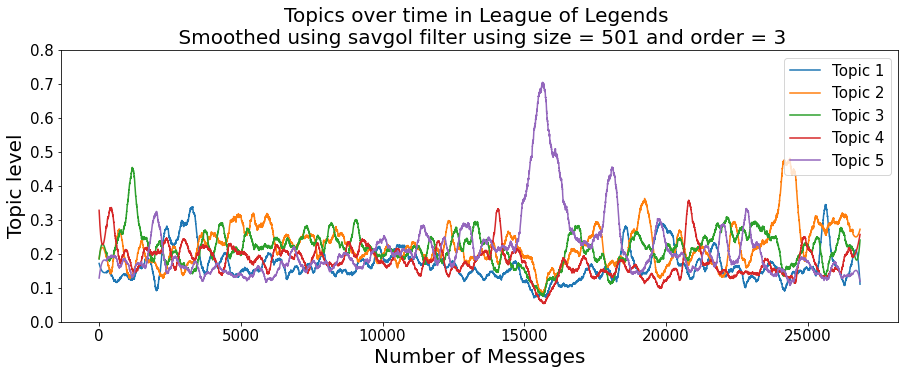

In [54]:
plt.figure(figsize=(15, 5))
start = 0
limit = league_topic_array2.shape[1]
limit = topic_array.shape[1]
window = 501
order = 3



plt.plot(range(league_topic_array2.shape[1])[start:start+limit], savgol_filter(league_topic_array2[0][start:start+limit], window, order), label="Topic 1")
plt.plot(range(league_topic_array2.shape[1])[start:start+limit], savgol_filter(league_topic_array2[1][start:start+limit], window, order), label="Topic 2")
plt.plot(range(league_topic_array2.shape[1])[start:start+limit], savgol_filter(league_topic_array2[2][start:start+limit], window, order), label="Topic 3")
plt.plot(range(league_topic_array2.shape[1])[start:start+limit], savgol_filter(league_topic_array2[3][start:start+limit], window, order), label="Topic 4")
plt.plot(range(league_topic_array2.shape[1])[start:start+limit], savgol_filter(league_topic_array2[4][start:start+limit], window, order), label="Topic 5")
plt.legend(fontsize=15, loc = "upper right")
plt.xlabel("Number of Messages", fontsize=20)
plt.ylabel("Topic level", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.8])
plt.title("Topics over time in League of Legends \n Smoothed using savgol filter using size = %d and order = %d" % (window, order), fontsize=20)

Text(0.5, 1.0, 'Topics over time in CSGO \n Smoothed using savgol filter with size = 501 and order = 3')

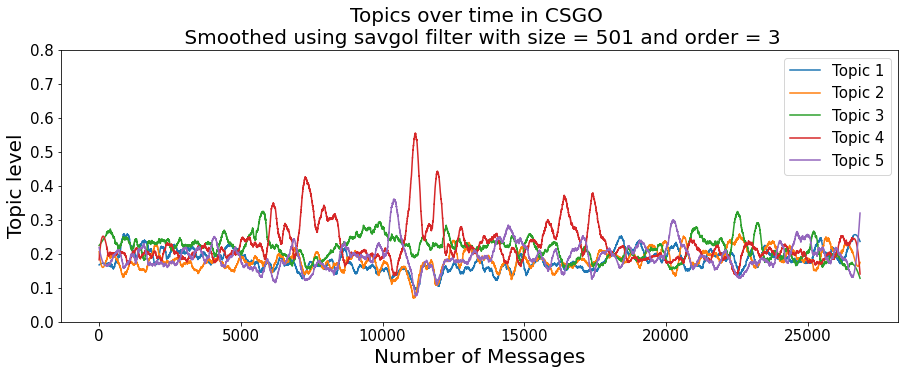

In [53]:
plt.figure(figsize=(15, 5))
start = 0
limit = csgo_topic_array2.shape[1]
limit = topic_array.shape[1]
window = 501
order = 3



plt.plot(range(csgo_topic_array2.shape[1])[start:start+limit], savgol_filter(csgo_topic_array2[0][start:start+limit], window, order), label="Topic 1")
plt.plot(range(csgo_topic_array2.shape[1])[start:start+limit], savgol_filter(csgo_topic_array2[1][start:start+limit], window, order), label="Topic 2")
plt.plot(range(csgo_topic_array2.shape[1])[start:start+limit], savgol_filter(csgo_topic_array2[2][start:start+limit], window, order), label="Topic 3")
plt.plot(range(csgo_topic_array2.shape[1])[start:start+limit], savgol_filter(csgo_topic_array2[3][start:start+limit], window, order), label="Topic 4")
plt.plot(range(csgo_topic_array2.shape[1])[start:start+limit], savgol_filter(csgo_topic_array2[4][start:start+limit], window, order), label="Topic 5")
plt.legend(fontsize=15)
plt.xlabel("Number of Messages", fontsize=20)
plt.ylabel("Topic level", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.8])
plt.title("Topics over time in CSGO \n Smoothed using savgol filter with size = %d and order = %d" % (window, order), fontsize=20)

Text(0.5, 1.0, 'Topics over time in World of Warcraft \n Smoothed using savgol filter using size = 501 and order = 3')

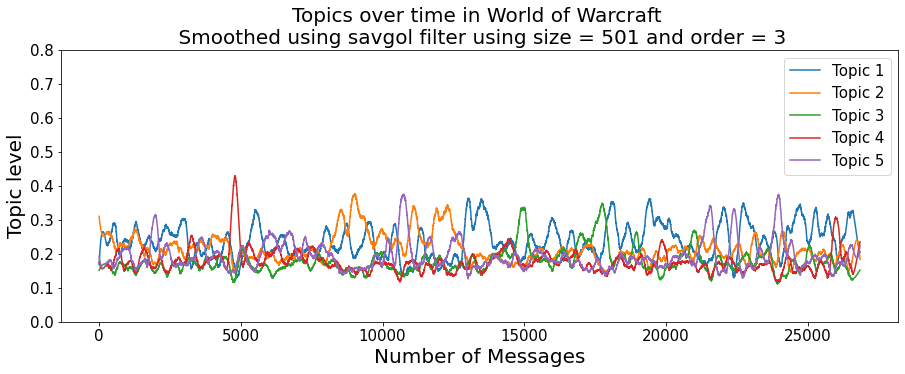

In [52]:
plt.figure(figsize=(15, 5))
start = 0
limit = warcraft_topic_array.shape[1]
limit = topic_array.shape[1]

window = 501
order = 3

plt.plot(range(warcraft_topic_array.shape[1])[start:start+limit], savgol_filter(warcraft_topic_array[0][start:start+limit], window, order), label="Topic 1")
plt.plot(range(warcraft_topic_array.shape[1])[start:start+limit], savgol_filter(warcraft_topic_array[1][start:start+limit], window, order), label="Topic 2")
plt.plot(range(warcraft_topic_array.shape[1])[start:start+limit], savgol_filter(warcraft_topic_array[2][start:start+limit], window, order), label="Topic 3")
plt.plot(range(warcraft_topic_array.shape[1])[start:start+limit], savgol_filter(warcraft_topic_array[3][start:start+limit], window, order), label="Topic 4")
plt.plot(range(warcraft_topic_array.shape[1])[start:start+limit], savgol_filter(warcraft_topic_array[4][start:start+limit], window, order), label="Topic 5")
plt.legend(fontsize=15, loc = "upper right")
plt.xlabel("Number of Messages", fontsize=20)
plt.ylabel("Topic level", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.8])
plt.title("Topics over time in World of Warcraft \n Smoothed using savgol filter using size = %d and order = %d" % (window, order), fontsize=20)

In [34]:
# the sequences that represent the max topic for each message in the streams
indexes = [np.argmax([topic_array[0][i], topic_array[1][i], topic_array[2][i], topic_array[3][i], topic_array[4][i]]) for i in range(topic_array.shape[1])]

league_indexes = [np.argmax([league_topic_array[0][i], league_topic_array[1][i], league_topic_array[2][i], league_topic_array[3][i], league_topic_array[4][i]]) for i in range(league_topic_array.shape[1])]

csgo_indexes = [np.argmax([csgo_topic_array[0][i], csgo_topic_array[1][i], csgo_topic_array[2][i], 
                           csgo_topic_array[3][i], csgo_topic_array[4][i]]) for i in range(csgo_topic_array.shape[1])]
warcraft_indexes = [np.argmax([warcraft_topic_array[0][i], warcraft_topic_array[1][i], warcraft_topic_array[2][i], 
                           warcraft_topic_array[3][i], warcraft_topic_array[4][i]]) for i in range(warcraft_topic_array.shape[1])]

In [35]:
csgo_indexes2 = [np.argmax([csgo_topic_array2[0][i], csgo_topic_array2[1][i], csgo_topic_array2[2][i], 
                           csgo_topic_array2[3][i], csgo_topic_array2[4][i]]) for i in range(csgo_topic_array2.shape[1])]

league_indexes2 = [np.argmax([league_topic_array2[0][i], league_topic_array2[1][i], league_topic_array2[2][i], 
                             league_topic_array2[3][i], league_topic_array2[4][i]]) for i in range(league_topic_array2.shape[1])]

In [36]:
# https://zhiyzuo.github.io/Plot-Lorenz/
# gini coefficient calculation
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55]),
 <a list of 10 Text major ticklabel objects>)

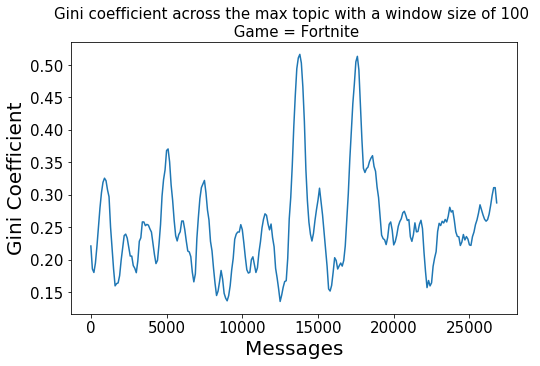

In [56]:
# plot the gini coefficient across fortnite stream duration
# gini is calculated like this gini(np.array(list(Counter(indexes[i:i+window_size]).values())))
# because it works by treating the values in the array as quantities
# before making this change, the gini coefficient was calculated directly on the max topic list
# for example [1, 0, 0, 4, 3] where each integer represents a different topic 
# however this had to change to the sum of each topic because it was incorrectly calulating the 
# coefficient by mistaking these integers as quantities and not just labels
filter = 21
order = 5

window_size = 100

ys = [gini(np.array(list(Counter(indexes[i:i+window_size]).values()))) for i in range(0, len(indexes), window_size)]
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(indexes), window_size), savgol_filter(ys, filter, order))
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = Fortnite' % (window_size), fontsize=15)
plt.xlabel('Messages', fontsize=20)
plt.ylabel('Gini Coefficient', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 8 Text major ticklabel objects>)

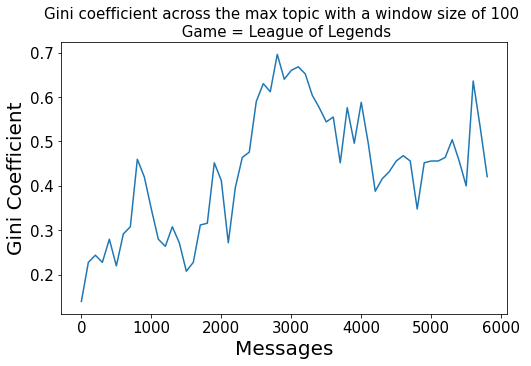

In [57]:
window_size = 100
ys = [gini(np.array(list(Counter(league_indexes[i:i+window_size]).values()))) for i in range(0, len(league_indexes), window_size)]
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(league_indexes), window_size), ys)
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = League of Legends' % (window_size), fontsize=15)
plt.xlabel('Messages', fontsize=20)
plt.ylabel('Gini Coefficient', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
 <a list of 11 Text major ticklabel objects>)

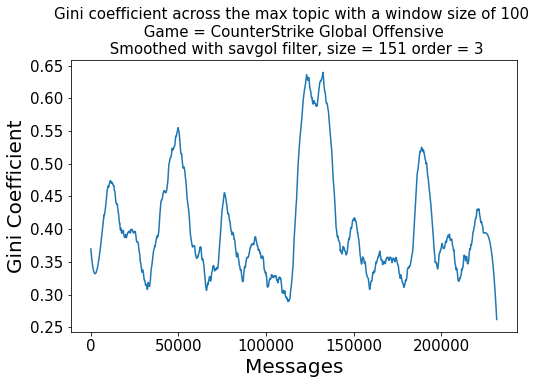

In [58]:
filter = 151
order = 3
window_size = 100
ys = [gini(np.array(list(Counter(csgo_indexes[i:i+window_size]).values()))) for i in range(0, len(csgo_indexes), window_size)]
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(csgo_indexes), window_size), savgol_filter(ys, filter, order))
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = CounterStrike Global Offensive \n Smoothed with savgol filter, size = %d order = %d' 
          % (window_size, filter, order), fontsize=15)
plt.xlabel('Messages', fontsize=20)
plt.ylabel('Gini Coefficient', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 7 Text major ticklabel objects>)

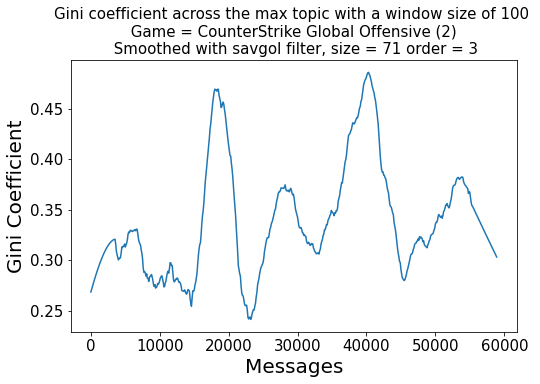

In [60]:
filter = 71
order = 3
window_size = 100
ys = [gini(np.array(list(Counter(csgo_indexes2[i:i+window_size]).values()))) for i in range(0, len(csgo_indexes2), window_size)]
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(csgo_indexes2), window_size), savgol_filter(ys, filter, order))
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = CounterStrike Global Offensive (2) \n Smoothed with savgol filter, size = %d order = %d' 
          % (window_size, filter, order), fontsize=15)
plt.xlabel('Messages', fontsize=20)
plt.ylabel('Gini Coefficient', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55]),
 <a list of 10 Text major ticklabel objects>)

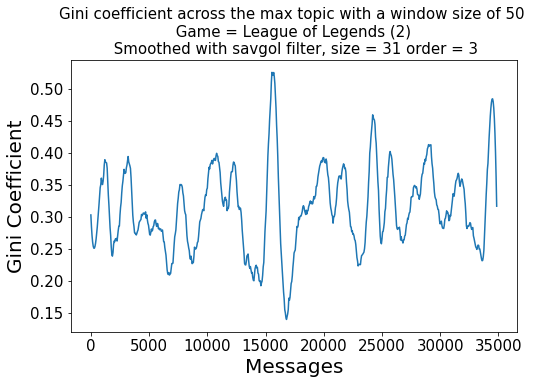

In [64]:
filter = 31
order = 3
window_size = 50
ys = [gini(np.array(list(Counter(league_indexes2[i:i+window_size]).values()))) for i in range(0, len(league_indexes2), window_size)]
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(league_indexes2), window_size), savgol_filter(ys, filter, order))
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = League of Legends (2) \n Smoothed with savgol filter, size = %d order = %d' 
          % (window_size, filter, order), fontsize=15)
plt.xlabel('Messages', fontsize=20)
plt.ylabel('Gini Coefficient', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
leagueys2 = [gini(np.array(list(Counter(league_indexes2[i:i+window_size]).values()))) for i in range(0, len(league_indexes2), window_size)]
csgoys2 = [gini(np.array(list(Counter(csgo_indexes2[i:i+window_size]).values()))) for i in range(0, len(csgo_indexes2), window_size)]

print("league 2 mean = %f, league 2 std = %f" % (np.mean(leagueys2), np.std(leagueys2)))
print("csgo 2 mean = %f, csgo 2 std = %f" % (np.mean(csgoys2), np.std(csgoys2)))

league 2 mean = 0.313067, league 2 std = 0.102692
csgo 2 mean = 0.349812, csgo 2 std = 0.107582


In [ ]:
leagueys = [gini(np.array(list(Counter(league_indexes[i:i+window_size]).values()))) for i in range(0, len(league_indexes), window_size)]
max(list(zip(range(0, len(league_indexes), window_size), leagueys)), key=lambda x:x[1])


(2650, 0.6799999999999999)

In [ ]:
Counter(league_indexes2[15000:17000])

Counter({0: 351, 1: 318, 2: 256, 3: 187, 4: 888})

(array([0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475,
        0.5  ]), <a list of 10 Text major ticklabel objects>)

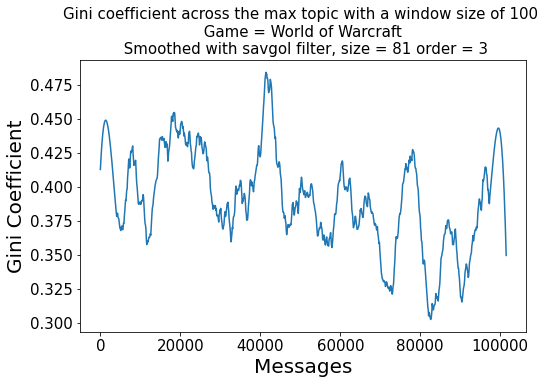

In [65]:
filter = 81
order = 3
window_size = 100
ys = [gini(np.array(list(Counter(warcraft_indexes[i:i+window_size]).values()))) for i in range(0, len(warcraft_indexes), window_size)]
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(warcraft_indexes), window_size), savgol_filter(ys, filter, order))
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = World of Warcraft \n Smoothed with savgol filter, size = %d order = %d' 
          % (window_size, filter, order), fontsize=15)
plt.xlabel('Messages', fontsize=20)
plt.ylabel('Gini Coefficient', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [43]:
fortys = [gini(np.array(list(Counter(indexes[i:i+window_size]).values()))) for i in range(0, len(indexes), window_size)]
wcys = [gini(np.array(list(Counter(warcraft_indexes[i:i+window_size]).values()))) for i in range(0, len(warcraft_indexes), window_size)]
csgoys = [gini(np.array(list(Counter(csgo_indexes[i:i+window_size]).values()))) for i in range(0, len(csgo_indexes), window_size)]
leagueys = [gini(np.array(list(Counter(league_indexes[i:i+window_size]).values()))) for i in range(0, len(league_indexes), window_size)]

In [ ]:
# max fortnite gini and message
max(list(zip(range(0, len(indexes), window_size), fortys)), key=lambda x:x[1])

(14100, 0.6120000000000003)

In [ ]:
# gini spike caused by topic 0 (1)
Counter(indexes[13500:14500])

Counter({0: 524, 1: 135, 2: 81, 3: 189, 4: 71})

In [ ]:
# max warcraft gini and message
max(list(zip(range(0, len(warcraft_indexes), window_size), wcys)), key=lambda x:x[1])

(13600, 0.6640000000000001)

In [ ]:
# gini spike caused by topic 0 (1)
Counter(warcraft_indexes[13000:14000])

Counter({0: 661, 1: 98, 2: 94, 3: 66, 4: 81})

In [ ]:
# max league gini and message
max(list(zip(range(0, len(league_indexes), window_size), leagueys)), key=lambda x:x[1])

(2800, 0.6960000000000002)

In [ ]:
# gini spike caused by topic 0 (1)
Counter(league_indexes[2200:3200])

Counter({0: 728, 1: 91, 2: 110, 3: 33, 4: 38})

In [ ]:
# max csgo gini and message
max(list(zip(range(0, len(csgo_indexes), window_size), csgoys)), key=lambda x:x[1])

(147200, 0.744)

In [ ]:
# gini spike caused by topic 0 (1)
Counter(csgo_indexes[146700:147700])

Counter({0: 707, 1: 71, 2: 81, 3: 46, 4: 95})

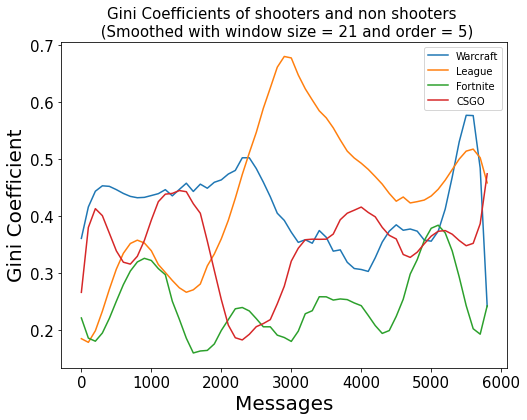

In [66]:
plt.figure(figsize=(8, 6))
filter = 21
order = 5
plt.plot(range(0, len(league_indexes), window_size), savgol_filter(wcys[:len(leagueys)], filter, order), label="Warcraft")
plt.plot(range(0, len(league_indexes), window_size), savgol_filter(leagueys, filter, order), label="League")
plt.plot(range(0, len(league_indexes), window_size), savgol_filter(fortys[:len(leagueys)], filter, order), label="Fortnite")
plt.plot(range(0, len(league_indexes), window_size), savgol_filter(csgoys[:len(leagueys)], filter, order), label="CSGO")

plt.title("Gini Coefficients of shooters and non shooters \n (Smoothed with window size = %d and order = %d)" % (filter, order), fontsize=15)
plt.ylabel("Gini Coefficient", fontsize=20)
plt.xlabel("Messages", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend()

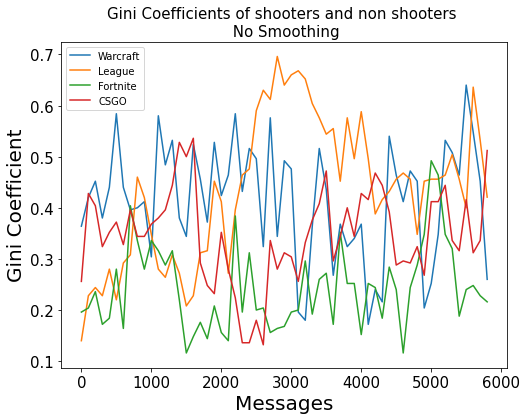

In [72]:
plt.figure(figsize=(8, 6))
filter = 21
order = 5
plt.plot(range(0, len(league_indexes), window_size), wcys[:len(leagueys)], label="Warcraft")
plt.plot(range(0, len(league_indexes), window_size), leagueys, label="League")
plt.plot(range(0, len(league_indexes), window_size), fortys[:len(leagueys)], label="Fortnite")
plt.plot(range(0, len(league_indexes), window_size), csgoys[:len(leagueys)], label="CSGO")

plt.title("Gini Coefficients of shooters and non shooters \n No Smoothing",  fontsize=15)
plt.ylabel("Gini Coefficient", fontsize=20)
plt.xlabel("Messages", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend()

In [67]:
from scipy.stats import shapiro, mannwhitneyu, iqr

In [ ]:
s, p = shapiro(fortys)
print("Fortnite statistic = %f, p value = %f" % (s, p))
s, p = shapiro(csgoys)
print("CSGO statistic = %f, p value = %f" % (s, p))
s, p = shapiro(leagueys)
print("League statistic = %f, p value = %f" % (s, p))
s, p = shapiro(wcys)
print("Warcraft statistic = %f, p value = %f" % (s, p))

Fortnite statistic = 0.940399, p value = 0.000000
CSGO statistic = 0.971615, p value = 0.000000
League statistic = 0.968231, p value = 0.125604
Warcraft statistic = 0.996965, p value = 0.050054


In [ ]:
print("Fortnite Gini %f, std %f, median %f" % (np.mean(fortys), np.std(fortys), np.median(fortys)))
print("CSGO Gini %f, std %f, median %f" % (np.mean(csgoys), np.std(csgoys), np.median(csgoys)))
print("League Gini %f, std %f, median %f" % (np.mean(leagueys), np.std(leagueys), np.median(leagueys)))
print("Warcraft Gini %f, std %f, median %f" % (np.mean(wcys), np.std(wcys), np.median(wcys)))

Fortnite Gini 0.252462, std 0.104079, median 0.228000
CSGO Gini 0.400150, std 0.129669, median 0.380000
League Gini 0.433963, std 0.138227, median 0.452000
Warcraft Gini 0.391012, std 0.110058, median 0.388000


In [ ]:
print("Fortnite median %f, iqr %f" % (np.median(fortys), iqr(fortys)))
print("CSGO median %f, iqr %f" % (np.median(csgoys), iqr(csgoys)))
print("League median %f, iqr %f" % (np.median(leagueys), iqr(leagueys)))
print("Warcraft median %f, iqr %f" % (np.median(wcys), iqr(wcys)))

Fortnite median 0.228000, iqr 0.128000
CSGO median 0.380000, iqr 0.164000
League median 0.452000, iqr 0.228000
Warcraft median 0.388000, iqr 0.148000


In [ ]:
import itertools


In [ ]:
vals = [fortys, csgoys, leagueys, wcys]
labels = ['Fortnite', 'CSGO', 'League', 'Warcraft']
values = list(itertools.combinations(vals, r=2))
for val in values:
    s, p = mannwhitneyu(val[0], val[1])
    print("%s and %s: statistic = %f, p value = %f" % (labels[vals.index(val[0])], labels[vals.index(val[1])], s, p))
  

Fortnite and CSGO: statistic = 111314.000000, p value = 0.000000
Fortnite and League: statistic = 2392.000000, p value = 0.000000
Fortnite and Warcraft: statistic = 48078.000000, p value = 0.000000
CSGO and League: statistic = 57589.500000, p value = 0.019089
CSGO and Warcraft: statistic = 1172072.000000, p value = 0.415320
League and Warcraft: statistic = 24324.500000, p value = 0.007427


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


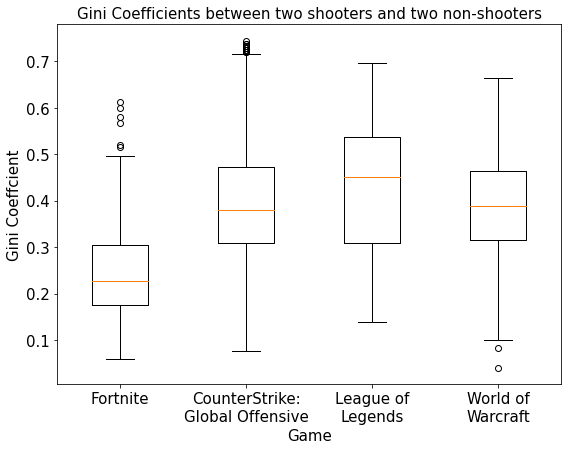

In [85]:
fig = plt.figure(figsize =(7, 5)) 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['Fortnite', 'CounterStrike:\nGlobal Offensive','League of\nLegends', 'World of\nWarcraft']) 

ax.set_xlabel('Game', fontsize=15)
ax.set_ylabel('Gini Coeffcient', fontsize=15)
ax.set_title('Gini Coefficients between two shooters and two non-shooters', fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
data = [fortys, csgoys, leagueys, wcys]
bp = ax.boxplot(data)

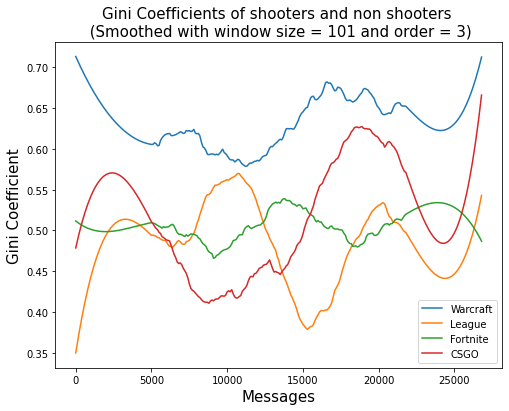

In [ ]:
plt.figure(figsize=(8, 6))
filter = 101
order = 3
window_size = 100
fortys = [gini(np.array(indexes[i:i+window_size])) for i in range(0, len(indexes), window_size)]
leagueys = [gini(np.array(league_indexes2[i:i+window_size])) for i in range(0, len(league_indexes2), window_size)]
csgoys = [gini(np.array(csgo_indexes2[i:i+window_size])) for i in range(0, len(csgo_indexes2), window_size)]
wcys = [gini(np.array(warcraft_indexes[i:i+window_size])) for i in range(0, len(warcraft_indexes), window_size)]
plt.plot(range(0, len(indexes), window_size), savgol_filter(wcys[:len(fortys)], filter, order), label="Warcraft")
plt.plot(range(0, len(indexes), window_size), savgol_filter(leagueys[:len(fortys)], filter, order), label="League")
plt.plot(range(0, len(indexes), window_size), savgol_filter(fortys[:len(fortys)], filter, order), label="Fortnite")
plt.plot(range(0, len(indexes), window_size), savgol_filter(csgoys[:len(fortys)], filter, order), label="CSGO")

plt.title("Gini Coefficients of shooters and non shooters \n (Smoothed with window size = %d and order = %d)" % (filter, order), fontsize=15)
plt.ylabel("Gini Coefficient", fontsize=15)
plt.xlabel("Messages", fontsize=15)

plt.legend()

Text(0, 0.5, 'Gini Coefficient')

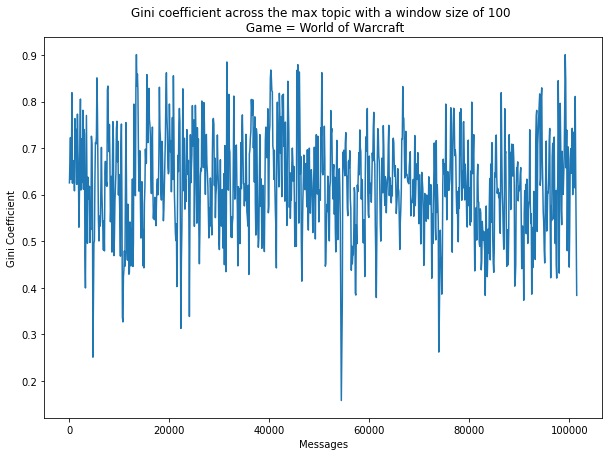

In [ ]:
window_size = 100
ys = [gini(np.array(warcraft_indexes[i:i+window_size])) for i in range(0, len(warcraft_indexes), window_size)]
plt.figure(figsize=(10, 7))
plt.plot(range(0, len(warcraft_indexes), window_size), ys)
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = World of Warcraft' % (window_size))
plt.xlabel('Messages')
plt.ylabel('Gini Coefficient')

Text(0, 0.5, 'Gini Coefficient')

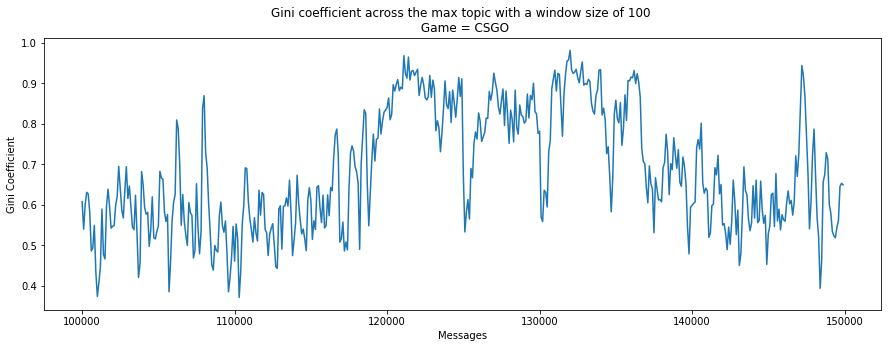

In [ ]:
window_size = 100
ys = [gini(np.array(csgo_indexes[i:i+window_size])) for i in range(0, len(csgo_indexes), window_size)]
plt.figure(figsize=(15, 5))
plt.plot(range(0, len(csgo_indexes), window_size)[1000:1500], ys[1000:1500])
plt.title('Gini coefficient across the max topic with a window size of %d \n Game = CSGO' % (window_size))
plt.xlabel('Messages')
plt.ylabel('Gini Coefficient')

In [ ]:
print("Fortnite Gini Coefficient %f" % gini(np.array(indexes)))
print("CSGO Gini Coefficient %f" % gini(np.array(csgo_indexes)))
print("League Gini Coefficient %f" % gini(np.array(league_indexes)))
print("Warcraft Gini Coefficient %f" % gini(np.array(warcraft_indexes)))

In [ ]:
# Plotting tools
!pip install -U pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
%matplotlib inline



In [ ]:
# create lda visualisation
pyLDAvis.enable_notebook()

fortnite_panel = pyLDAvis.sklearn.prepare(fortnite_lda_model, fortnite_data_vectorized, fortnite_vectorizer, mds='tsne', sort_topics=False)
csgo_panel = pyLDAvis.sklearn.prepare(csgo_lda_model, csgo_data_vectorized, csgo_vectorizer, mds='tsne', sort_topics=False)
league_panel = pyLDAvis.sklearn.prepare(league_lda_model, league_data_vectorized, league_vectorizer, mds='tsne', sort_topics=False)
warcraft_panel = pyLDAvis.sklearn.prepare(warcraft_lda_model, warcraft_data_vectorized, warcraft_vectorizer, mds='tsne', sort_topics=False)

In [ ]:
fortnite_panel

In [ ]:
csgo_panel

In [ ]:
league_panel

In [ ]:
warcraft_panel

In [ ]:
# show n top words for each topic  
# https://ronak-k-bhatia.medium.com/natural-language-processing-for-post-livestream-analysis-d3b5a8c77706

import matplotlib.pyplot as plt 
import numpy as np 

def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [ ]:
fortnite_topic_keywords = show_topics(vectorizer=fortnite_vectorizer, lda_model=fortnite_lda_model, n_words=10) 
csgo_topic_keywords = show_topics(vectorizer=csgo_vectorizer, lda_model=csgo_lda_model, n_words=10) 
league_topic_keywords = show_topics(vectorizer=league_vectorizer, lda_model=league_lda_model, n_words=10) 
warcraft_topic_keywords = show_topics(vectorizer=warcraft_vectorizer, lda_model=warcraft_lda_model, n_words=10) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# show the top 10 words for each topic in the fortnite model 
import pandas as pd
fortnite_topic_keywords = show_topics(vectorizer=fortnite_vectorizer, lda_model=fortnite_lda_model, n_words=10) 
df_fortnite_topic_keywords = pd.DataFrame(np.array(fortnite_topic_keywords).T)
df_fortnite_topic_keywords.columns =  ['Topic '+str(i + 1) for i in range(df_fortnite_topic_keywords.shape[1])]
df_fortnite_topic_keywords.index = ['Word '+str(i + 1) for i in range(df_fortnite_topic_keywords.shape[0])]
df_fortnite_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Word 1,lul,ninja,pog,love,lol
Word 2,pepe,trihard,way,text,haha
Word 3,like,tfuewaaa,biblethump,sym,face
Word 4,kappa,chat,cmonbruh,tfue,brookeeee
Word 5,residentsleeper,game,dbe,brooke,tear
Word 6,ninjagold,tfuesweater,cecd,sub,joy
Word 7,ninjablast,stream,good,fca,skin
Word 8,time,chap,lulw,brook,dont
Word 9,wtf,respond,guy,cloak,ninjaaim
Word 10,fuck,got,bro,symffist,need


In [ ]:
df_fortnite_topic_keywords.to_csv("/content/fortnite_topics.csv")

In [ ]:
df_csgo_topic_keywords = pd.DataFrame(np.array(csgo_topic_keywords).T)
df_csgo_topic_keywords.columns = ['Topic '+str(i + 1) for i in range(df_csgo_topic_keywords.shape[1])]
df_csgo_topic_keywords.index = ['Word '+str(i + 1) for i in range(df_csgo_topic_keywords.shape[0])] 
df_csgo_topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Word 1,lulw,pog,haha,pepe,lul
Word 2,quiet,trihard,biblethump,cache,head
Word 3,residentsleeper,liquid,new,kappa,silent
Word 4,telephone,wutface,clap,sweat,steam
Word 5,receiver,let,kreygasm,droplet,like
Word 6,squid,way,game,right,major
Word 7,astralis,god,time,pointing,drinkpurple
Word 8,map,face,notlikethis,index,start
Word 9,vac,crowd,xqcp,backhand,dansgame
Word 10,chat,monkaw,bot,major,rip


In [ ]:
df_csgo_topic_keywords.to_csv("/content/csgo_topics.csv")

In [ ]:
league_vectorizer.get_feature_names_out()

In [ ]:
league_topic_keywords = show_topics(vectorizer=league_vectorizer, lda_model=league_lda_model, n_words=10) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
league_topic_keywords
df_league_topic_keywords = pd.DataFrame(np.array(league_topic_keywords).T)


In [ ]:
df_league_topic_keywords.shape

(10, 5)

In [ ]:

df_league_topic_keywords = pd.DataFrame(np.array(league_topic_keywords).T)
df_league_topic_keywords.columns = ['Topic '+str(i + 1) for i in range(df_league_topic_keywords.shape[1])]
df_league_topic_keywords.index =  ['Word '+str(i + 1) for i in range(df_league_topic_keywords.shape[0])]
df_league_topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Word 1,pepe,lul,lulw,pog,monkahmm
Word 2,song,boom,clap,way,head
Word 3,haha,residentsleeper,ratirlmangos,world,quiet
Word 4,kekw,cmonbruh,kreygasm,wheelchair,let
Word 5,monkaw,kappa,kong,nam,weirdchamp
Word 6,trihard,chat,hong,symbol,datsheffy
Word 7,lol,free,team,monkas,xqcp
Word 8,bye,game,jebait,wutface,oce
Word 9,tsm,win,play,heyguys,help
Word 10,biblethump,bad,good,forsene,copy


In [ ]:
df_league_topic_keywords.to_csv('/content/league_topics.csv')


In [ ]:
df_warcraft_topic_keywords = pd.DataFrame(np.array(warcraft_topic_keywords).T)
df_warcraft_topic_keywords.columns = ['Topic '+str(i + 1) for i in range(df_warcraft_topic_keywords.shape[1])]
df_warcraft_topic_keywords.index = ['Word '+str(i + 1) for i in range(df_warcraft_topic_keywords.shape[0])]
df_warcraft_topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Word 1,pog,lul,pepe,faead,clap
Word 2,lulw,kappa,jebait,gachibass,kapp
Word 3,lol,wow,asmonsmash,smorc,true
Word 4,monkaw,classic,asmon,asmonpls,dansgame
Word 5,head,good,chat,like,kreygasm
Word 6,haha,got,game,asmonkool,pjsalt
Word 7,yes,horde,face,hair,need
Word 8,trihard,time,fuck,bad,beta
Word 9,wtf,alliance,music,people,bfa
Word 10,dont,man,play,fucking,use
